# Evaluate motor activity of depression patients (and healthy control group)

Depression is a severe illness which can lead to suicide. More than 264 million people worldwide suffer from depression. It is one of the main causes for disability and the second leading cause of death in the age group of 15-29-year-olds (Source: WHO; https://www.who.int/news-room/fact-sheets/detail/depression).

Fortunately, there are effective psychological and pharmacological treatments. **Measuring motor activity** could be one way to provide an diagnostic early warning system.

***

The **underlying data sets** provide the motor activity of 23 patients with depression and 32 controls (healthy). The severity of the depression is assessed by experts using the Montgomery-Asberg Depression Rating Scale (MADRS). MADRS levels range from 0 to 60. Values above 30 represent a severe depression, values below 10 indicate a healthy state.

Original paper see here: https://www.researchgate.net/publication/325021337_Depresjon_A_Motor_Activity_Database_of_Depression_Episodes_in_Unipolar_and_Bipolar_Patients

***


## <font color=blue>Table of Contents </font>
* [Explore Score File](#1)
* [Clean / Explore Condition Table](#2)
* [Explore Control Table](#3)
* [Activity Data - Exploration](#4)
* [Loop over files and extract info](#5)
* [Comparison Condition vs Control](#6)

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# files
!ls ../data

condition  control    scores.csv


In [3]:
data_path = '../data/'

<a id='1'></a>
# Explore Score File

In [4]:
# load score file
df = pd.read_csv(data_path + 'scores.csv')

In [5]:
# show file (it's quite small so it can be displayed at once)
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [6]:
# add difference of scores ("after activity recording" minus "before activity recording")
df['DeltaMADRS'] = df.madrs2 - df.madrs1

#### Control rows have empty columns except for number (id), days, gender and age. Therefore let's split between condition and control observations.

In [7]:
# split in condition and control table
df_condition = df[df.number.str.contains('condition')].copy()
df_control = df[df.number.str.contains('control')].copy()

<a id='2'></a>
# Clean / Explore Condition Table

In [8]:
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0


In [9]:
df_condition.shape

(23, 13)

In [10]:
# define standard text for missing values
txt_missing = '_MISSING_'

In [11]:
# prep melanch column
df_condition.melanch = df_condition.melanch.fillna(txt_missing)
df_condition.melanch = df_condition.melanch.astype('category') # convert to categorical
df_condition.melanch = df_condition.melanch.cat.rename_categories({-1 : txt_missing,
                                                                   1.0 : '1',
                                                                   2.0 : '2'})

# age, gender => category
df_condition.age = df_condition.age.astype('category')
df_condition.gender = df_condition.gender.astype('category')

# further type conversions (float => int => category)
df_condition.afftype = df_condition.afftype.astype(int).astype('category')
df_condition.inpatient = df_condition.inpatient.astype(int).astype('category')
df_condition.marriage = df_condition.marriage.astype(int).astype('category')
df_condition.work = df_condition.work.astype(int).astype('category')

# imputation
df_condition.edu = df_condition.edu.astype('category')
df_condition.edu = df_condition.edu.cat.rename_categories({' ' : txt_missing})

In [12]:
# let's check the cleaned data set
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,1.0
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0
5,condition_6,7,1,35-39,2,2,2,6-10,1,2,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1,_MISSING_,2,11-15,2,1,24.0,25.0,1.0
7,condition_8,5,2,25-29,2,_MISSING_,2,11-15,1,2,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1,_MISSING_,2,6-10,1,2,26.0,26.0,0.0
9,condition_10,9,2,45-49,2,2,2,6-10,1,2,28.0,21.0,-7.0


In [13]:
# define numerical and categorical features
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

## Numerical Features

In [14]:
# basic stats
df_condition[features_num].describe()

,days,madrs1,madrs2,DeltaMADRS
count,23.000000,23.000000,23.000000,23.000000
mean,12.652174,22.739130,20.000000,-2.739130
std,2.773391,4.797892,4.729021,3.968253
min,5.000000,13.000000,11.000000,-13.000000
25%,12.500000,18.500000,16.000000,-5.000000
50%,13.000000,24.000000,21.000000,-3.000000
75%,14.000000,26.000000,24.500000,0.000000
max,18.000000,29.000000,28.000000,4.000000


#### Development of MADRS score (before activity recording / after activity recording):

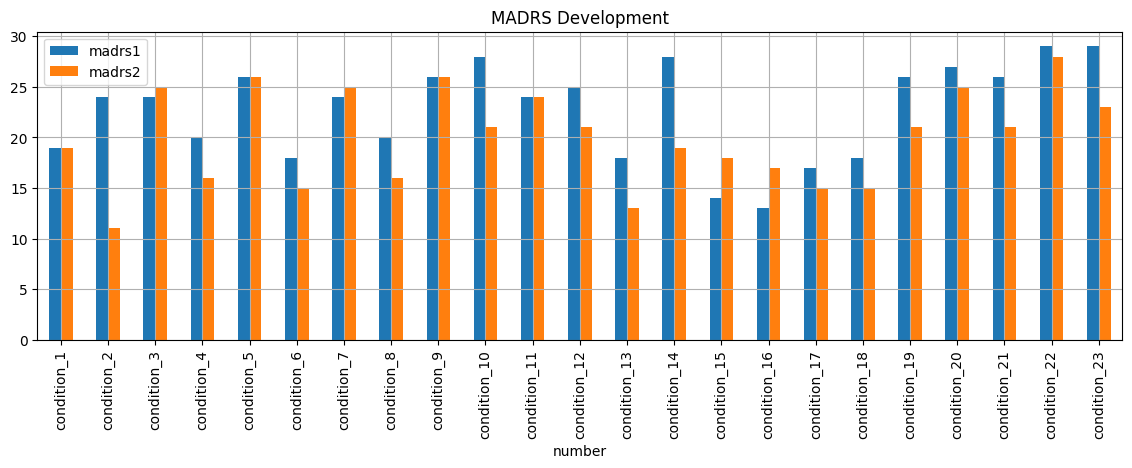

In [15]:
# barplot of MADRS scores (before/after)
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
df_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

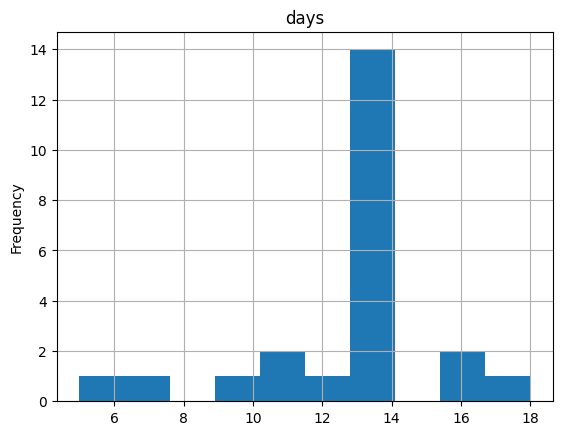

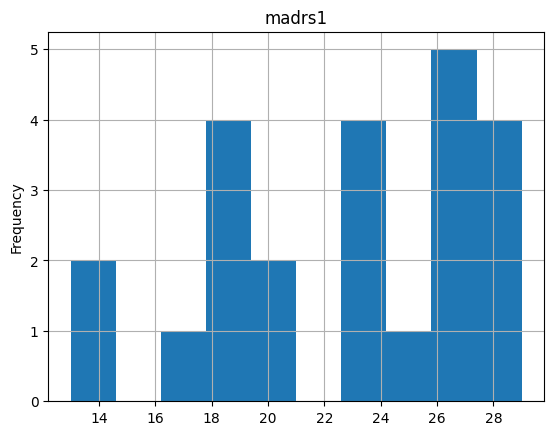

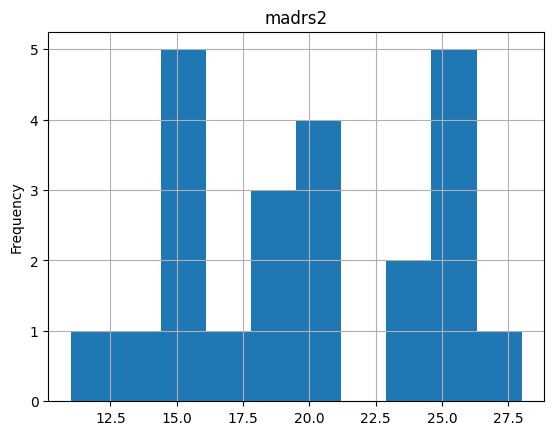

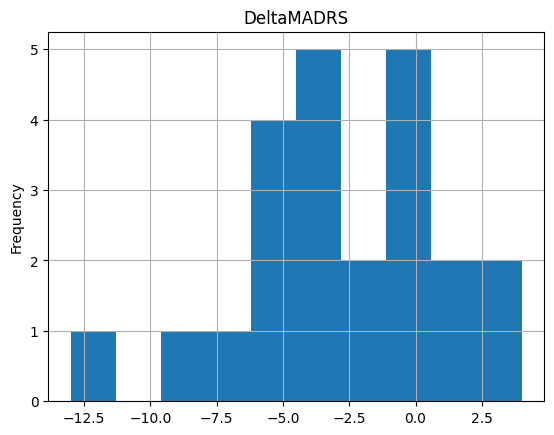

In [16]:
# plot distributions of numerical features
for f in features_num:
    df_condition[f].plot(kind='hist')
    plt.title(f)
    plt.grid()
    plt.show()

### Correlations

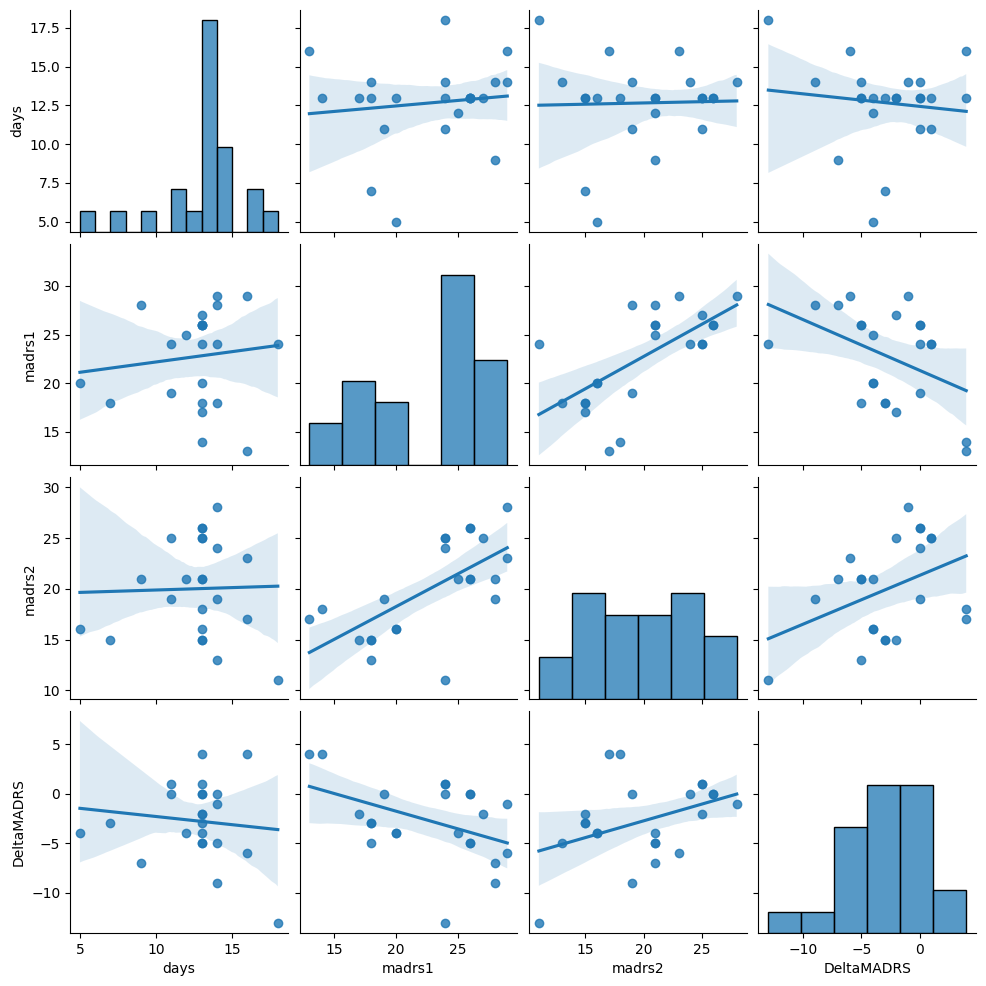

In [17]:
# scatter plot for each pair incl. regression line
sns.pairplot(df_condition[features_num], kind='reg')
plt.show()

In [18]:
# correlation matrix
df_condition[features_num].corr(method='pearson')

,days,madrs1,madrs2,DeltaMADRS
days,1.000000,0.122678,0.027726,-0.115285
madrs1,0.122678,1.000000,0.653090,-0.430772
madrs2,0.027726,0.653090,1.000000,0.402082
DeltaMADRS,-0.115285,-0.430772,0.402082,1.000000


## Categorical Features

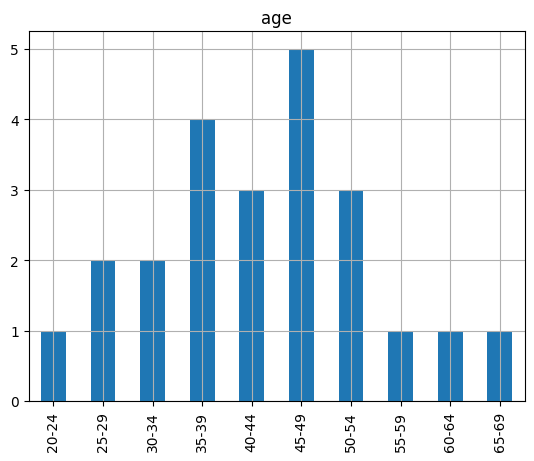

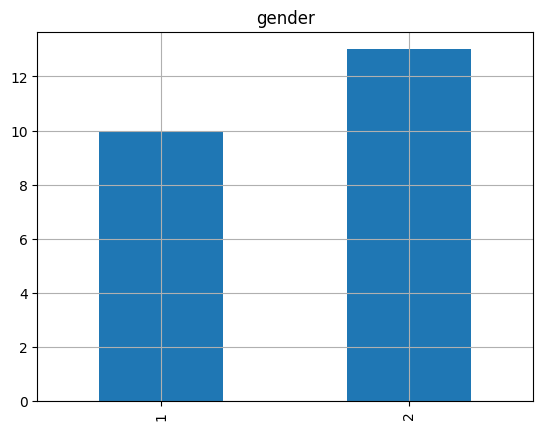

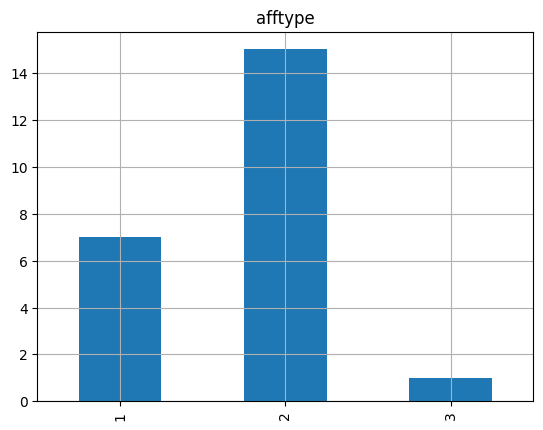

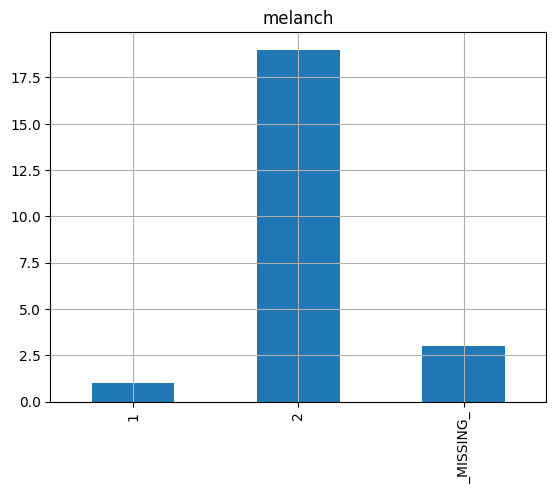

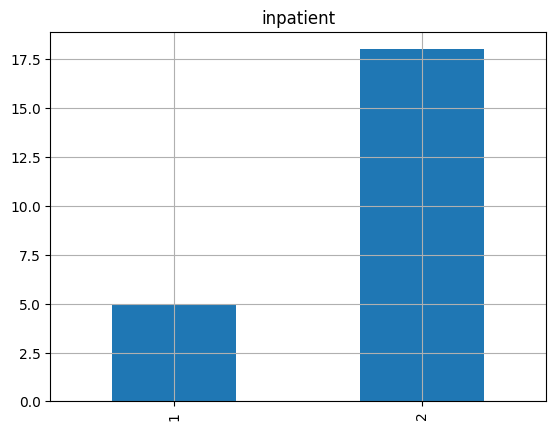

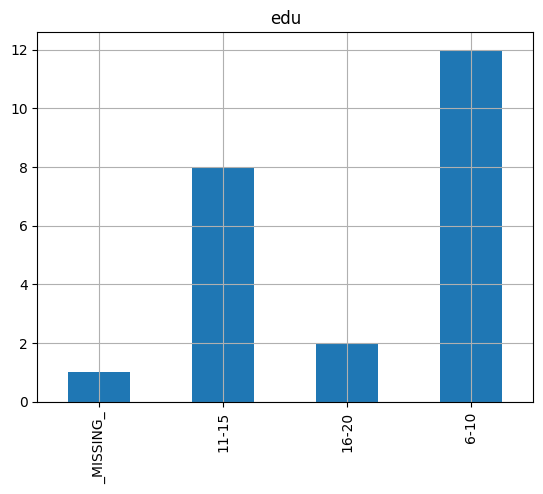

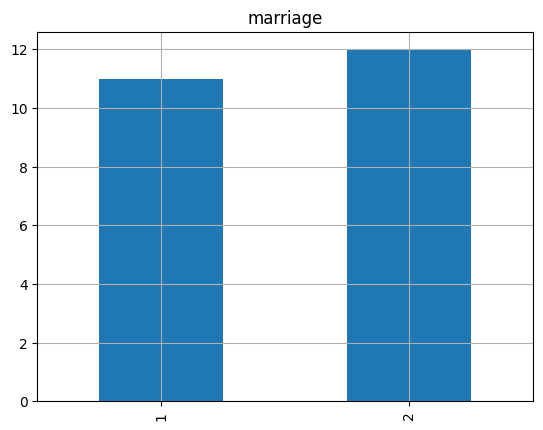

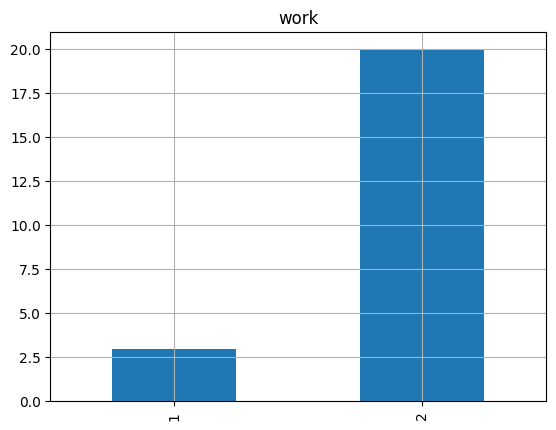

In [19]:
# plot distributions of categorical features
for f in features_cat:
    df_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

### Impact of categorical features on scores

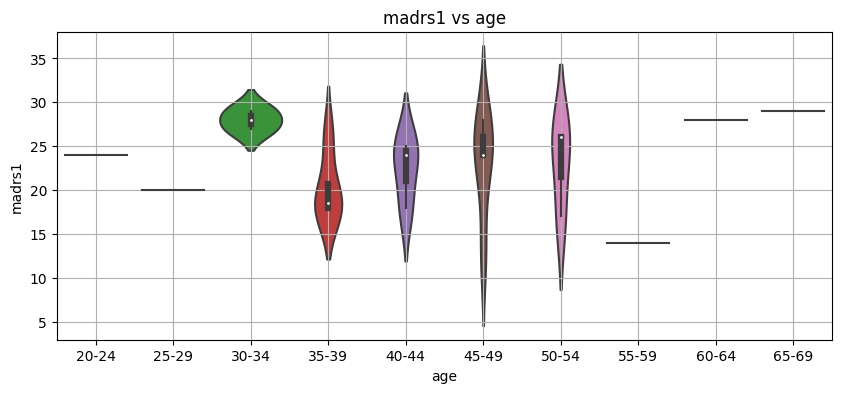

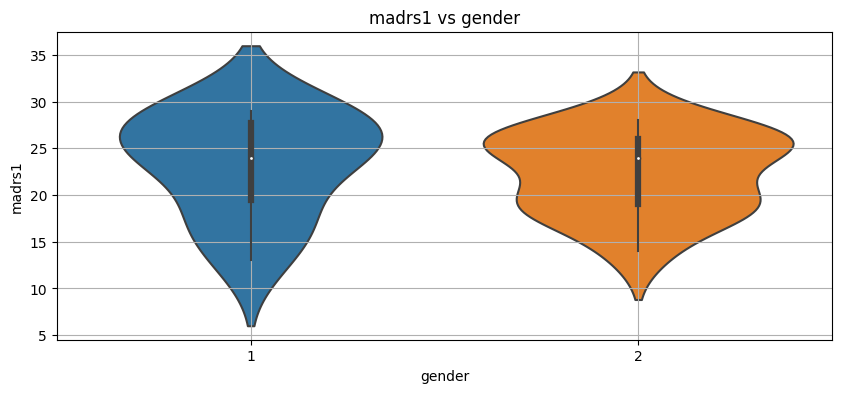

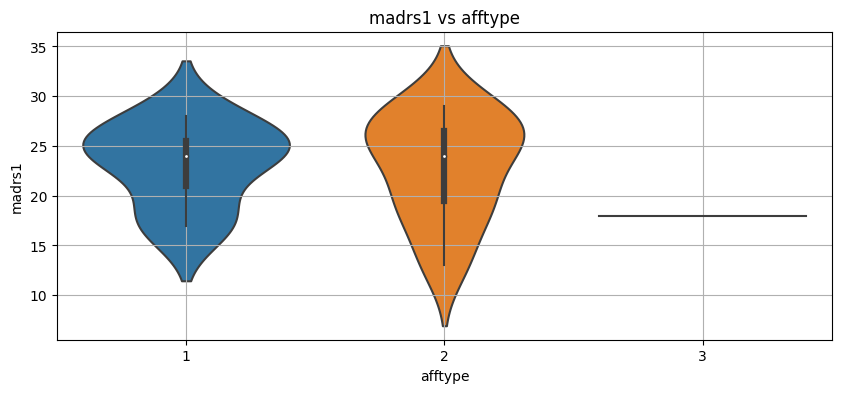

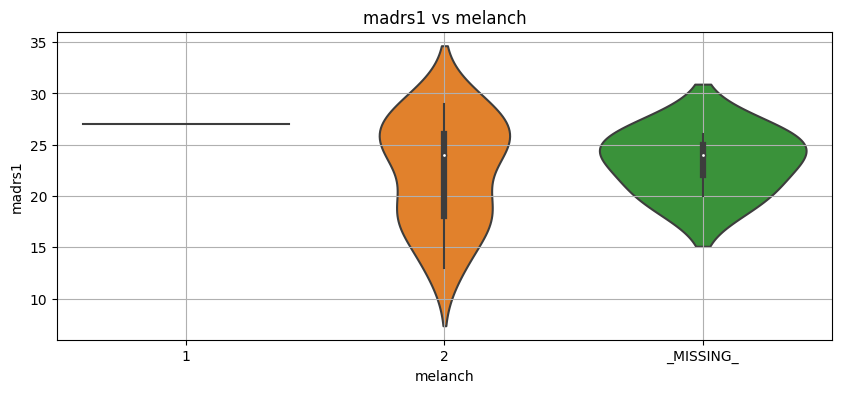

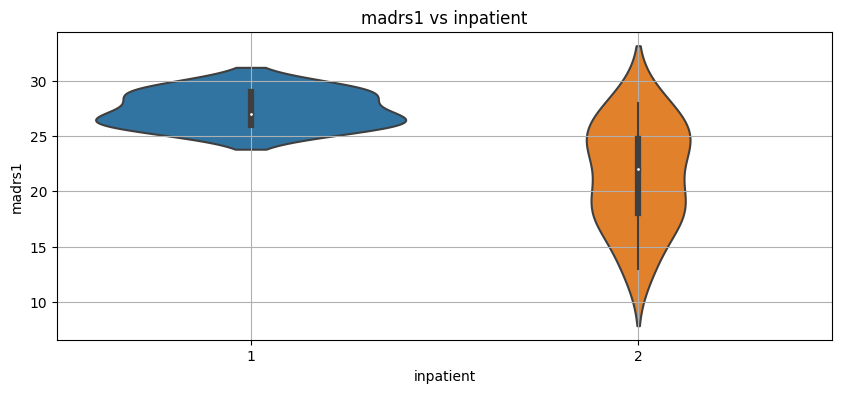

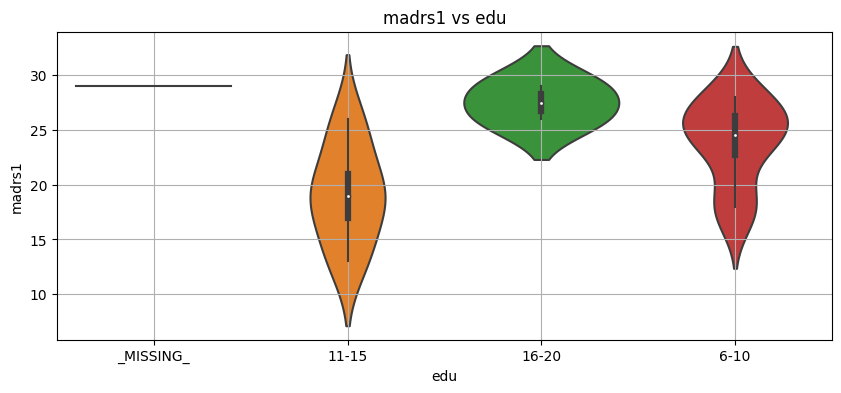

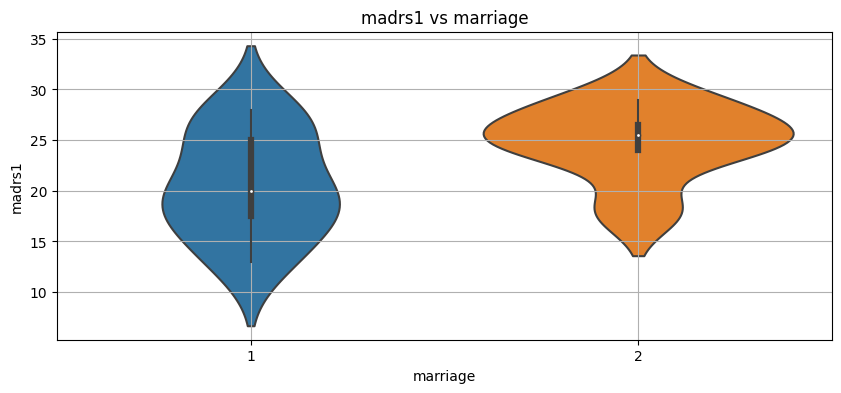

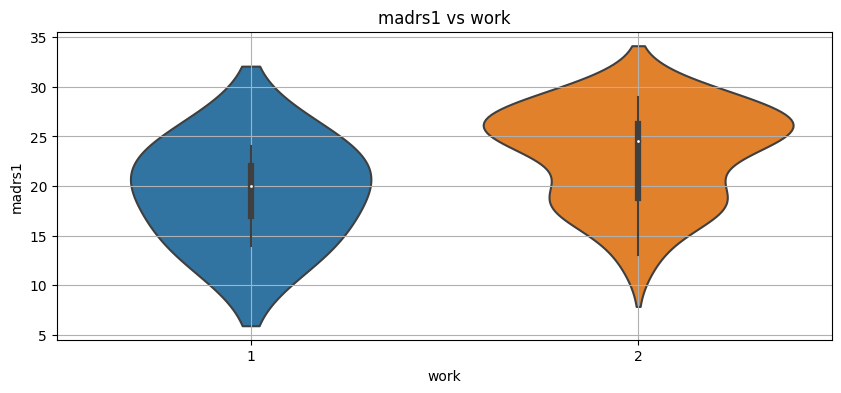

In [20]:
# impact of feature on score madrs1 (at begin of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

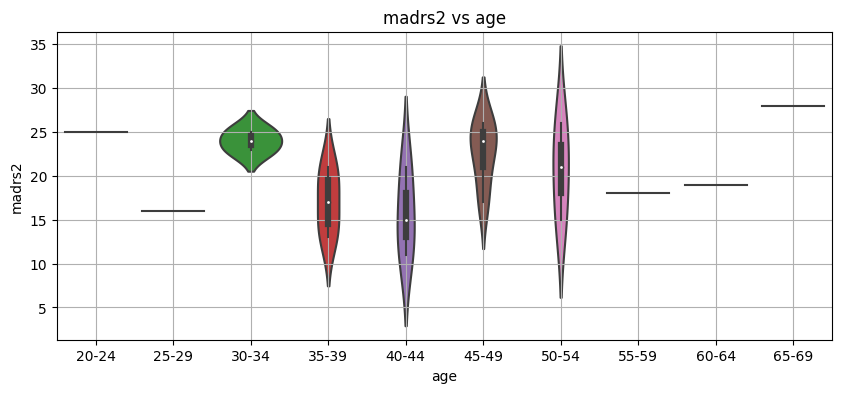

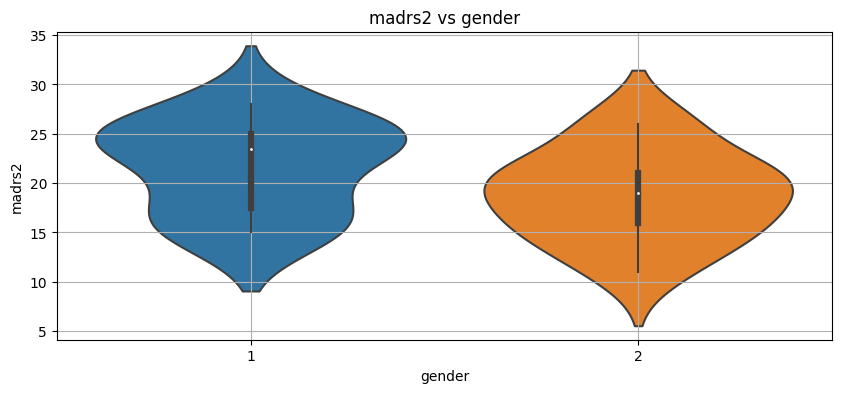

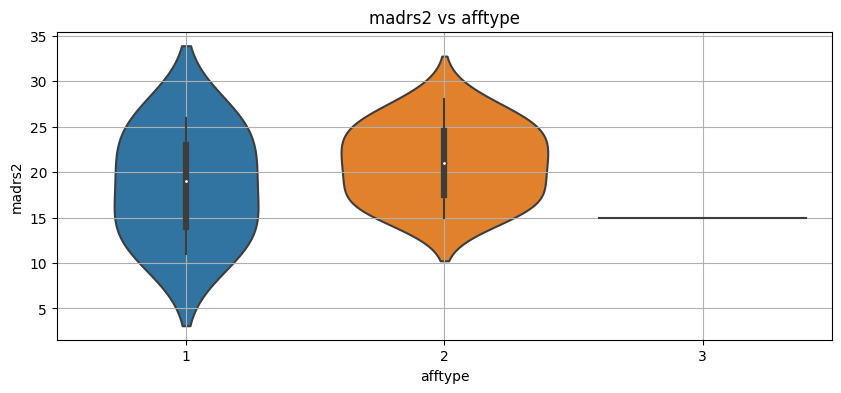

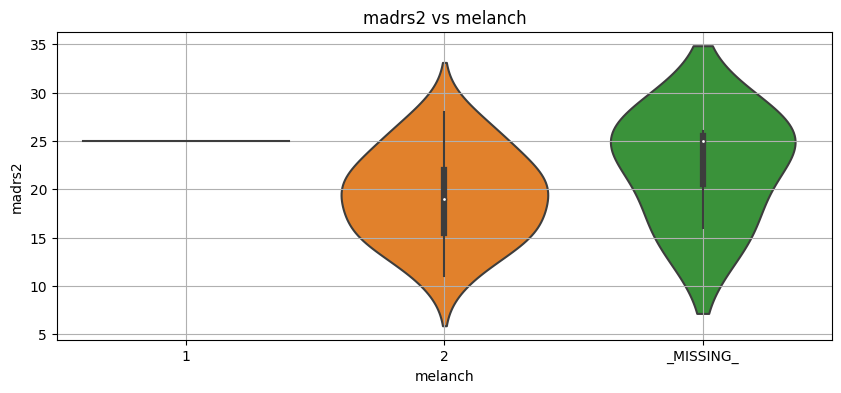

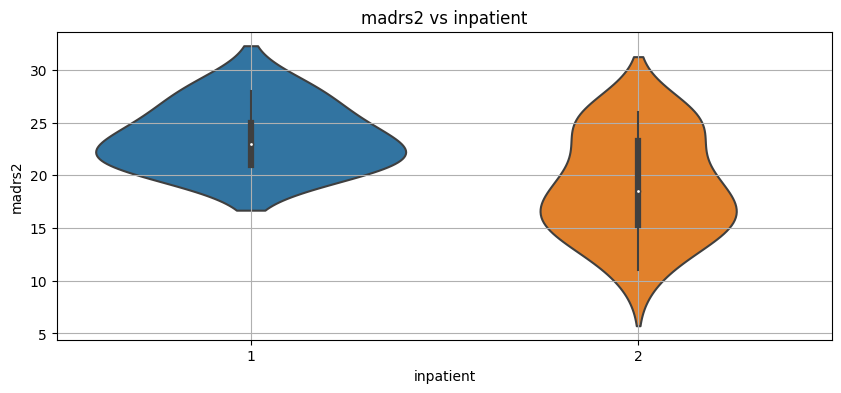

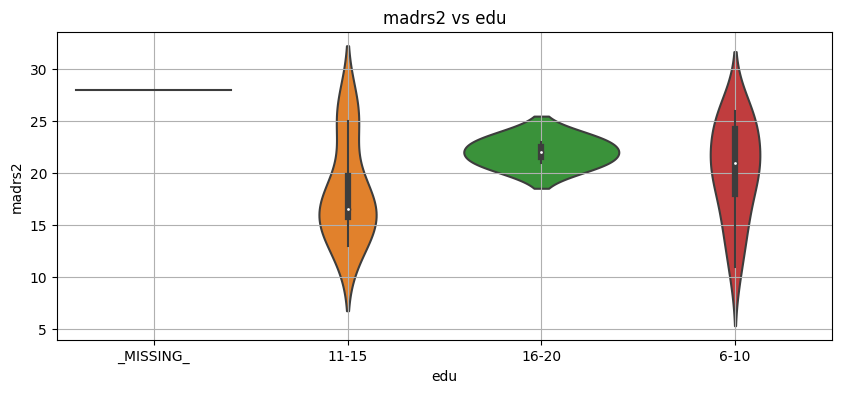

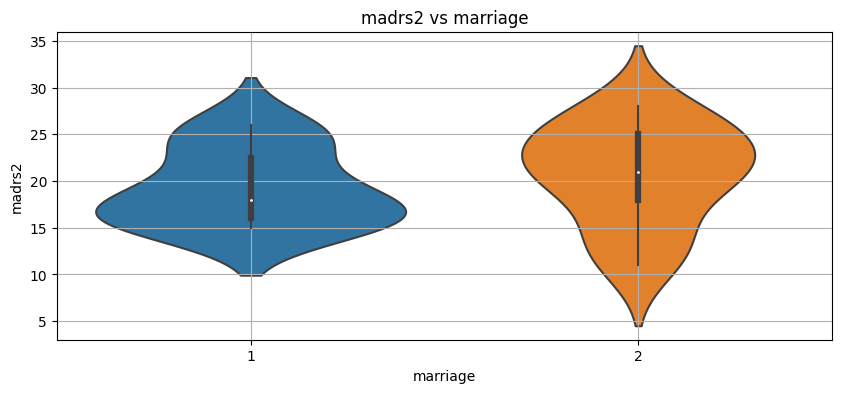

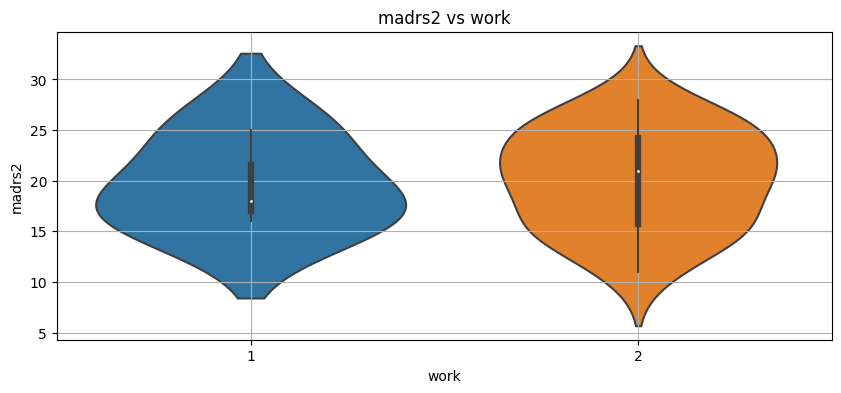

In [21]:
# impact of feature on score madrs2 (at end of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()

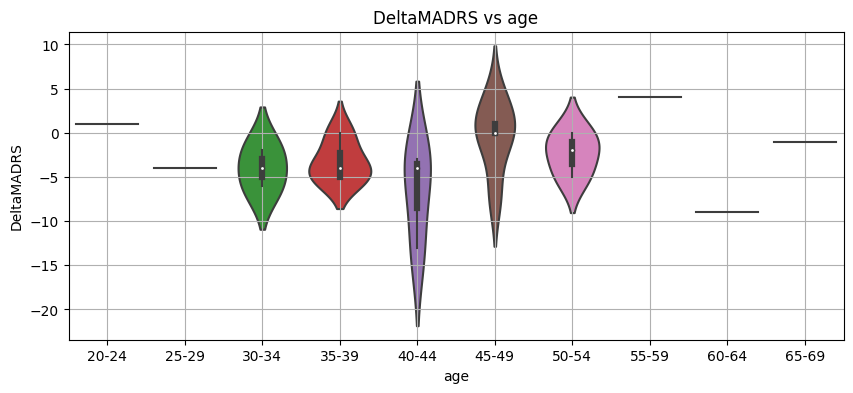

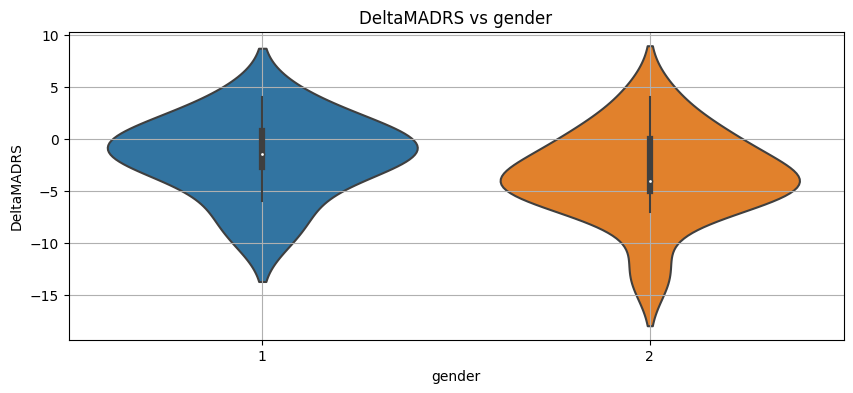

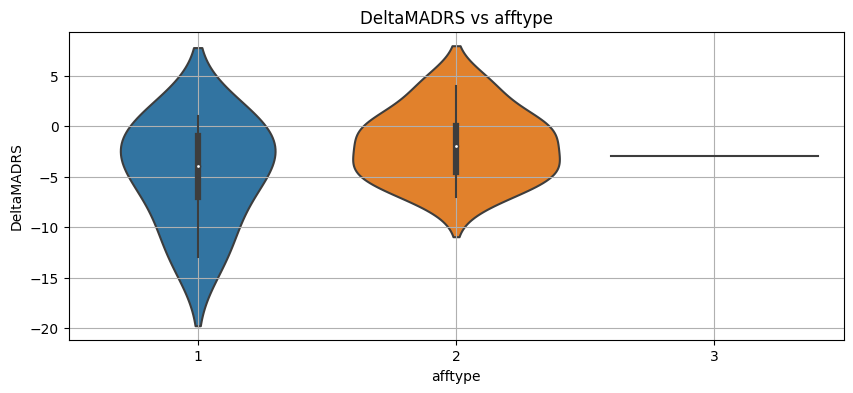

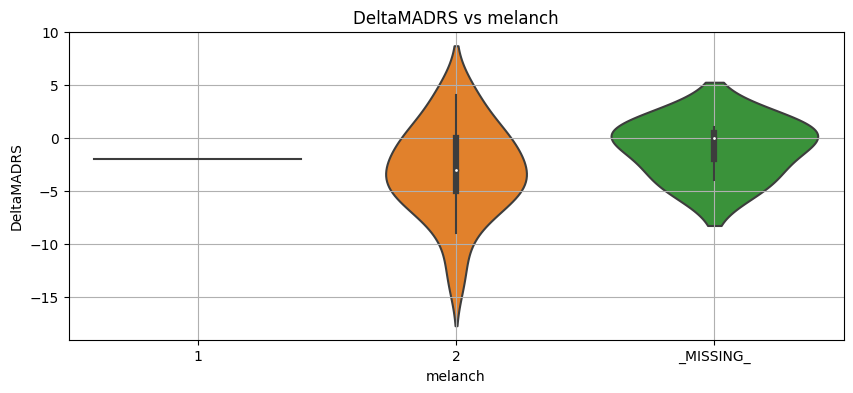

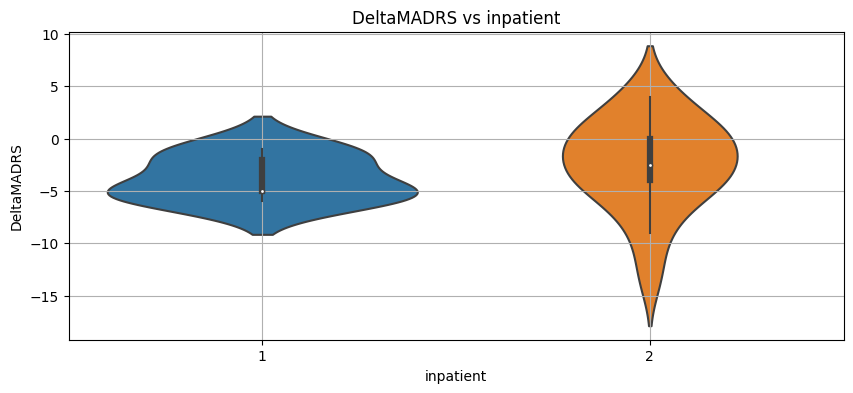

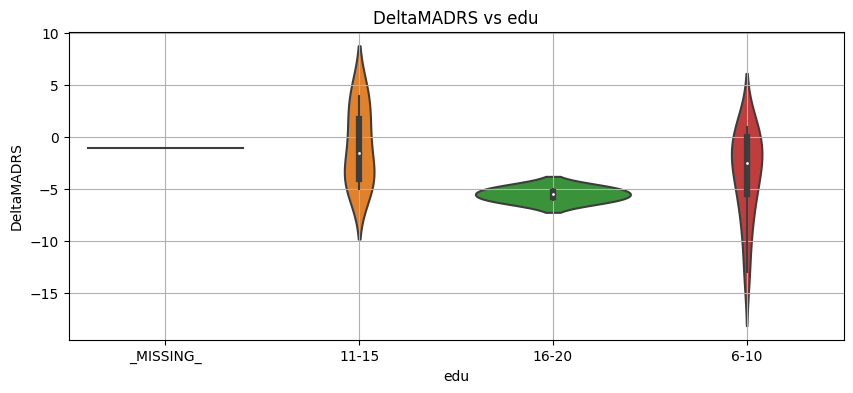

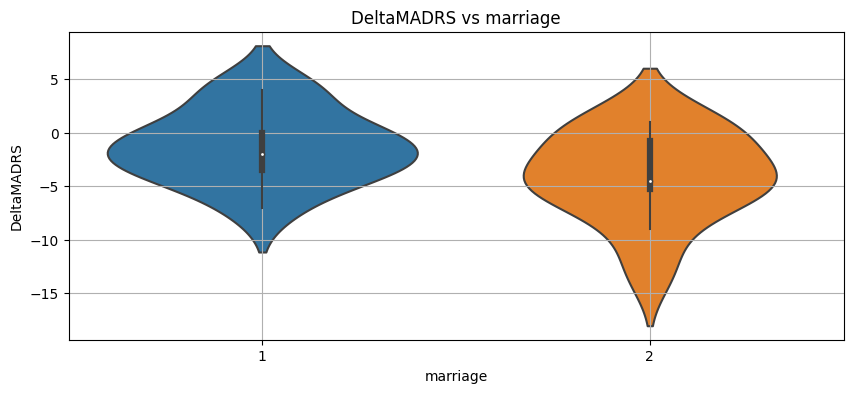

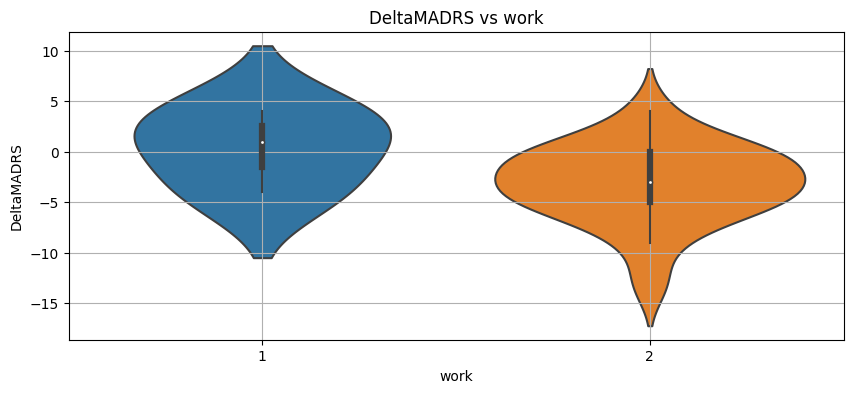

In [22]:
# impact of feature on score difference DeltaMADRS = madrs2 - madrs1
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='DeltaMADRS')
    plt.title('DeltaMADRS vs ' + f)
    plt.grid()
    plt.show()

<a id='3'></a>
# Explore Control Table

In [23]:
df_control

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,control_2,20,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
25,control_3,12,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
26,control_4,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
27,control_5,13,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
28,control_6,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
29,control_7,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
30,control_8,13,2,40-44,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
31,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
32,control_10,8,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


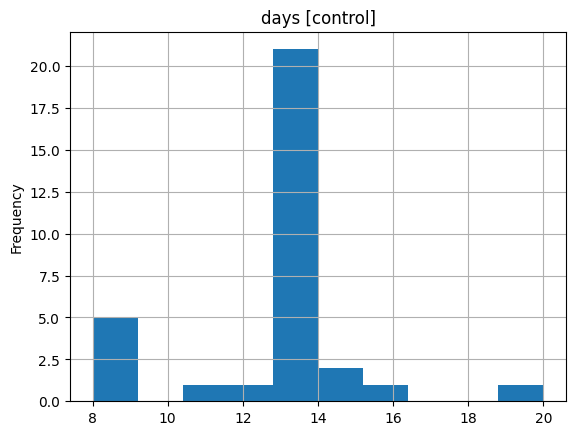

In [24]:
# distribution of days
df_control.days.plot(kind='hist')
plt.title('days [control]')
plt.grid()
plt.show()

In [25]:
# type conversion
df_control.age = df_control.age.astype('category')
df_control.gender = df_control.gender.astype('category')

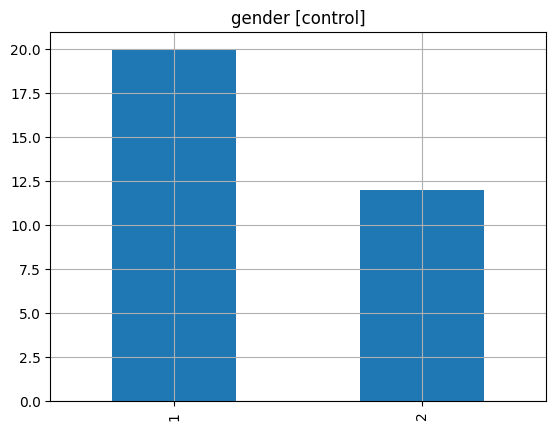

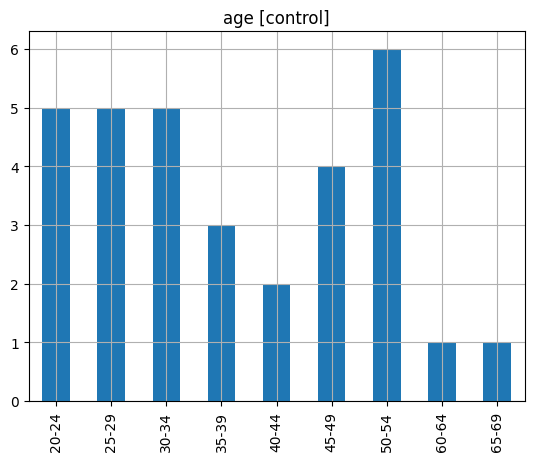

In [26]:
# plot distributions of categorical features
df_control.gender.value_counts().sort_index().plot(kind='bar')
plt.title('gender [control]')
plt.grid()
plt.show()

df_control.age.value_counts().sort_index().plot(kind='bar')
plt.title('age [control]')
plt.grid()
plt.show()

<a id='4'></a>
# Activity Data - Exploration

In [27]:
# load a specific file
my_file = data_path + 'condition/condition_1.csv'
df_act = pd.read_csv(my_file)
df_act.head(10)

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
5,2003-05-07 12:05:00,2003-05-07,160
6,2003-05-07 12:06:00,2003-05-07,17
7,2003-05-07 12:07:00,2003-05-07,646
8,2003-05-07 12:08:00,2003-05-07,978
9,2003-05-07 12:09:00,2003-05-07,306


In [28]:
# dimensions
df_act.shape

(23244, 3)

In [29]:
# basic stats of activity
df_act.activity.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    23244.000000
mean       146.948030
std        294.592424
min          0.000000
1%           0.000000
10%          0.000000
25%          0.000000
50%          9.000000
75%        172.000000
90%        469.000000
99%       1300.000000
max       3526.000000
Name: activity, dtype: float64

In [30]:
# add logarithmic version of activity
df_act['log1_act'] = np.log10(1+df_act.activity)

# add non-zero indicator for activity
df_act['non_zero'] = (df_act.activity>0).astype(int)

### Distribution

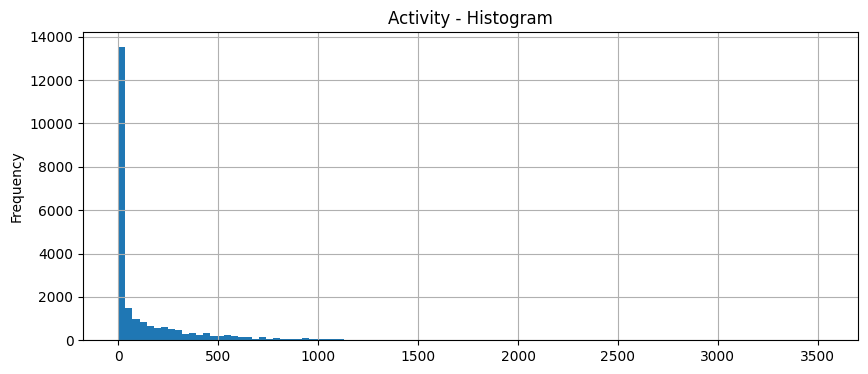

In [31]:
# distribution of activity
plt.figure(figsize=(10,4))
df_act.activity.plot(kind='hist', bins=100)
plt.title('Activity - Histogram')
plt.grid()
plt.show()

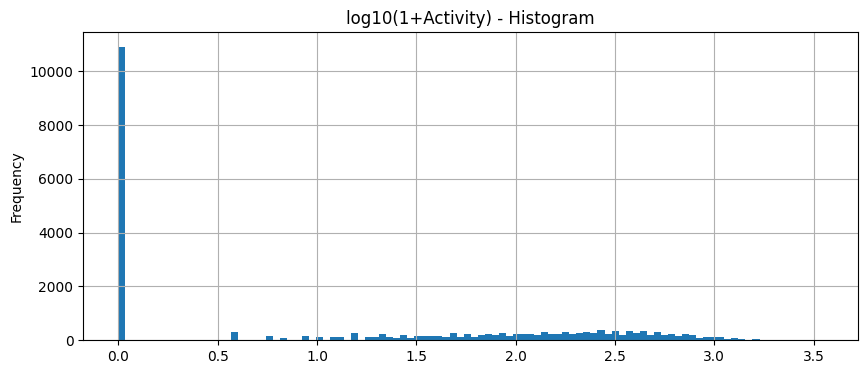

In [32]:
# distribution of activity - log transformation
plt.figure(figsize=(10,4))
df_act.log1_act.plot(kind='hist', bins=100)
plt.title('log10(1+Activity) - Histogram')
plt.grid()
plt.show()

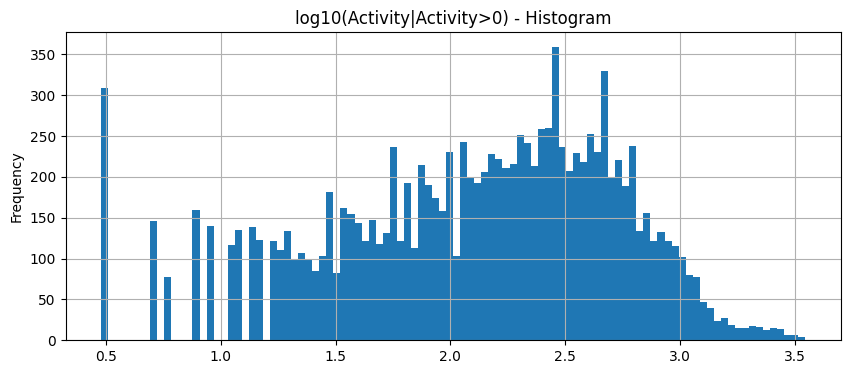

In [33]:
# distribution of activity - log transformation - non zeroes only
plt.figure(figsize=(10,4))
np.log10(df_act[df_act.non_zero==1].activity).plot(kind='hist', bins=100)
plt.title('log10(Activity|Activity>0) - Histogram')
plt.grid()
plt.show()

### Time Series

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


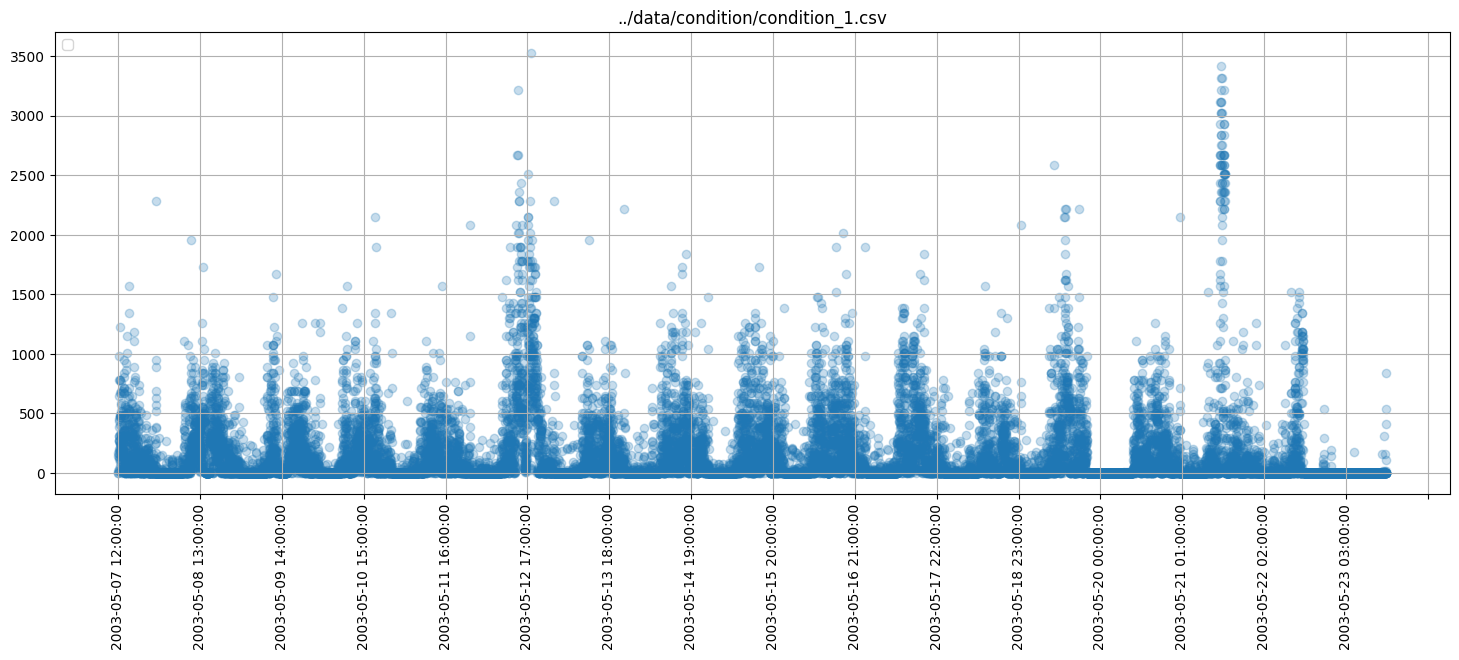

In [34]:
# plot full activity time series
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_act.timestamp, df_act.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


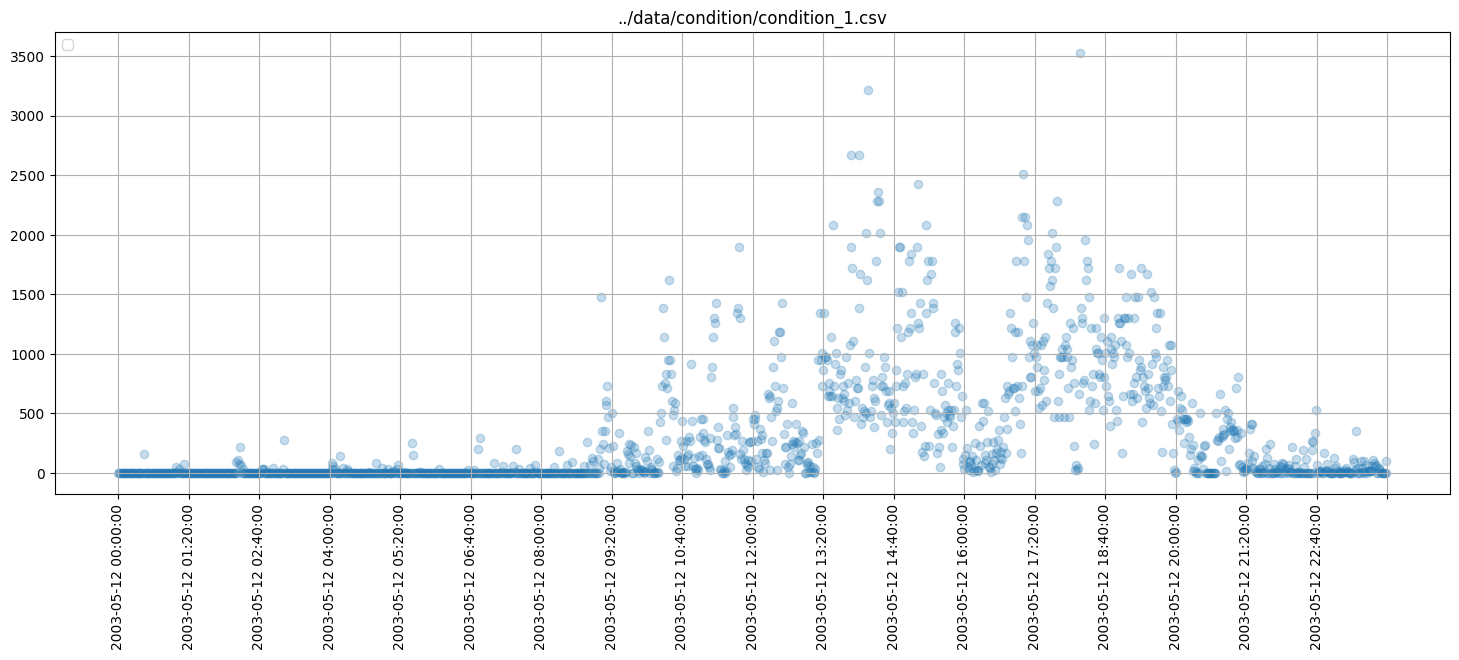

In [35]:
# zoom into a specific day
df_act_zoom = df_act[df_act.date=='2003-05-12']
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_act_zoom.timestamp, df_act_zoom.activity, alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

### Evaluate by Date

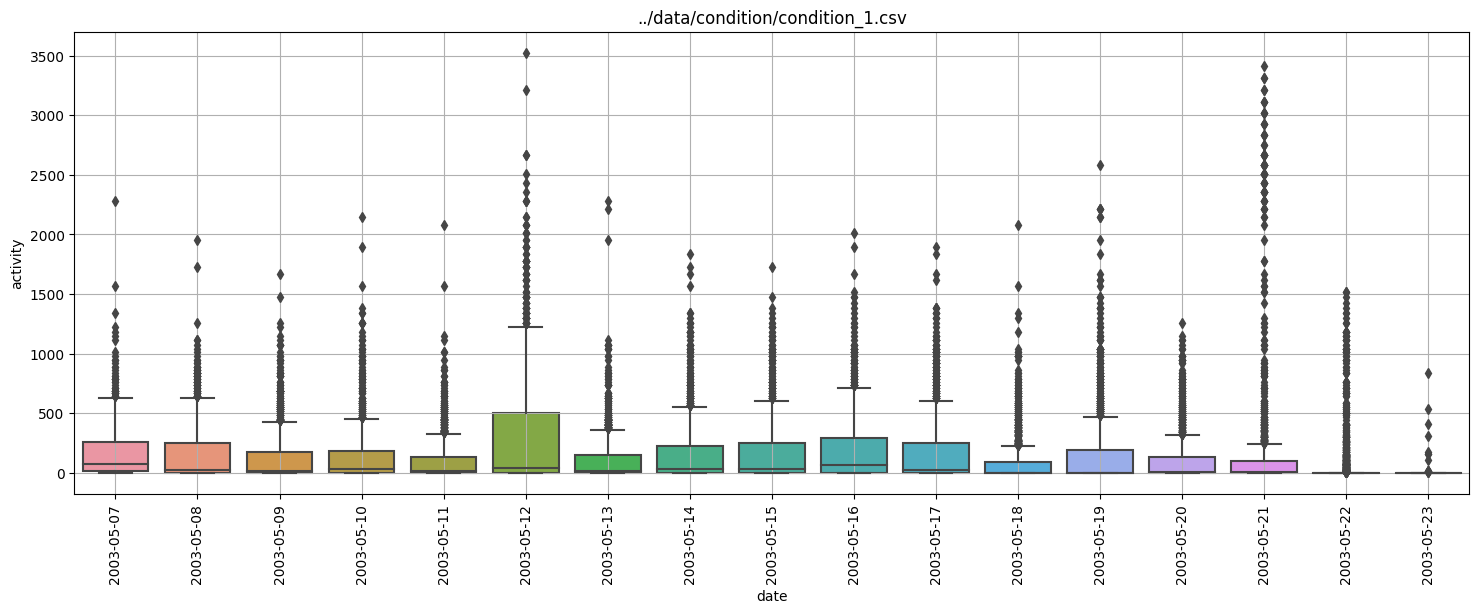

In [36]:
# group activity by date
plt.subplots(figsize=(18,6))
sns.boxplot(data=df_act, x='date', y='activity')
plt.xticks(rotation=90)
plt.title(my_file)
plt.grid()
plt.show()

In [37]:
# group by date
df_act_by_date = df_act.groupby(['date'], as_index=False).agg(
    n = pd.NamedAgg(column='activity', aggfunc='count'),
    n_non_zero = pd.NamedAgg(column='non_zero', aggfunc='sum'),
    mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
    q75_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=75)),
    q90_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=90)),
    q95_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=95)),
    q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
    max_act = pd.NamedAgg(column='activity', aggfunc='max'))

df_act_by_date

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
0,2003-05-07,720,573,174.144444,259.00,485.0,667.0,1003.92,2284
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.00,1954
2,2003-05-09,1440,775,124.135417,172.00,398.0,587.0,948.00,1672
3,2003-05-10,1440,901,134.961806,184.00,411.0,587.0,1097.35,2146
4,2003-05-11,1440,835,99.439583,134.00,328.0,469.0,759.00,2080
5,2003-05-12,1440,873,316.874306,500.00,1010.0,1384.0,2055.04,3526
6,2003-05-13,1440,770,108.475694,148.00,361.0,469.0,879.08,2284
7,2003-05-14,1440,869,155.684722,227.00,469.0,667.0,1182.00,1836
8,2003-05-15,1440,864,170.877083,250.00,533.0,759.0,1146.00,1725
9,2003-05-16,1440,948,190.508333,288.50,568.0,759.0,1167.96,2016


#### The first and the last day in this example are incomplete. For the sake of comparability we will remove those incomplete days!

In [38]:
# remove incomplete days from stats
df_act_by_date = df_act_by_date[df_act_by_date.n==1440] # 1440 = 24*60 minutes in a day
df_act_by_date

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.00,1954
2,2003-05-09,1440,775,124.135417,172.00,398.0,587.0,948.00,1672
3,2003-05-10,1440,901,134.961806,184.00,411.0,587.0,1097.35,2146
4,2003-05-11,1440,835,99.439583,134.00,328.0,469.0,759.00,2080
5,2003-05-12,1440,873,316.874306,500.00,1010.0,1384.0,2055.04,3526
6,2003-05-13,1440,770,108.475694,148.00,361.0,469.0,879.08,2284
7,2003-05-14,1440,869,155.684722,227.00,469.0,667.0,1182.00,1836
8,2003-05-15,1440,864,170.877083,250.00,533.0,759.0,1146.00,1725
9,2003-05-16,1440,948,190.508333,288.50,568.0,759.0,1167.96,2016
10,2003-05-17,1440,853,177.760417,250.00,587.0,835.0,1205.79,1894


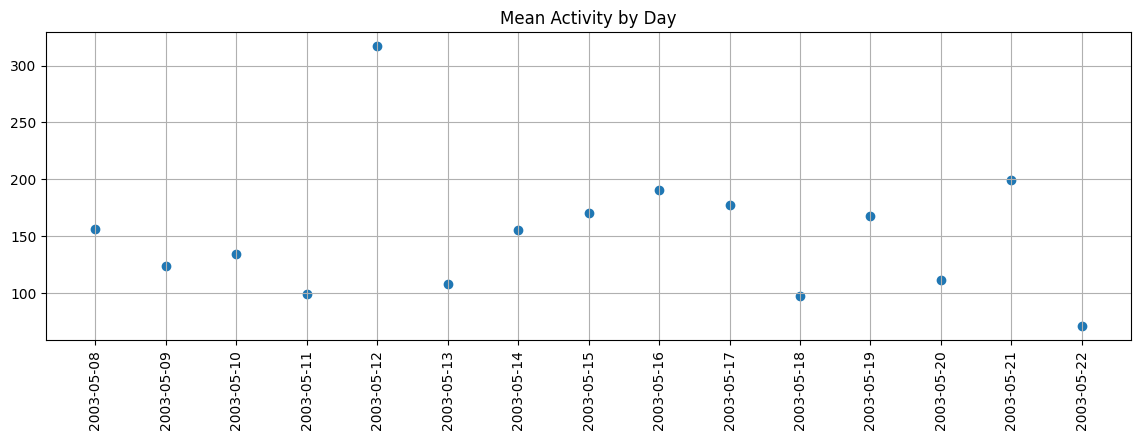

Mean of daily means: 152.2
Stdev of daily means: 59.22


In [39]:
# plot mean activity by day
plt.figure(figsize=(14,4))
plt.scatter(df_act_by_date.date, df_act_by_date.mean_act)
plt.title('Mean Activity by Day')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print('Mean of daily means:', np.round(df_act_by_date.mean_act.mean(),2))
print('Stdev of daily means:', np.round(df_act_by_date.mean_act.std(),2))

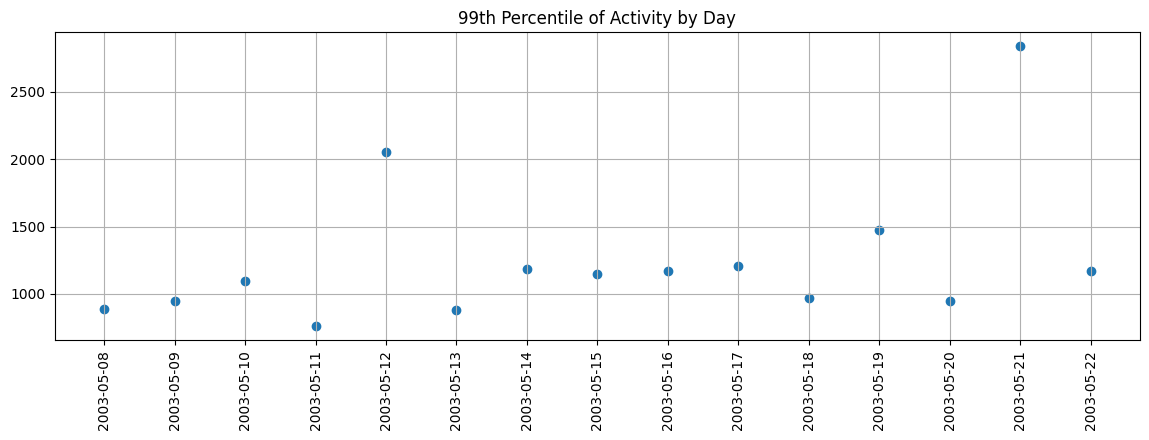

Mean of daily 99th percentile: 1248.37
Stdev of daily 99th percentile: 537.75


In [40]:
# plot 99th percentile of activity by day
plt.figure(figsize=(14,4))
plt.scatter(df_act_by_date.date, df_act_by_date.q99_act)
plt.title('99th Percentile of Activity by Day')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print('Mean of daily 99th percentile:', np.round(df_act_by_date.q99_act.mean(),2))
print('Stdev of daily 99th percentile:', np.round(df_act_by_date.q99_act.std(),2))

<a id='5'></a>
# Loop over files and extract info

## Condition

In [41]:
# show all condition files
!ls ../data/condition

condition_1.csv  condition_15.csv condition_20.csv condition_5.csv
condition_10.csv condition_16.csv condition_21.csv condition_6.csv
condition_11.csv condition_17.csv condition_22.csv condition_7.csv
condition_12.csv condition_18.csv condition_23.csv condition_8.csv
condition_13.csv condition_19.csv condition_3.csv  condition_9.csv
condition_14.csv condition_2.csv  condition_4.csv


### Let's look at another example before automatically evaluating all files:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


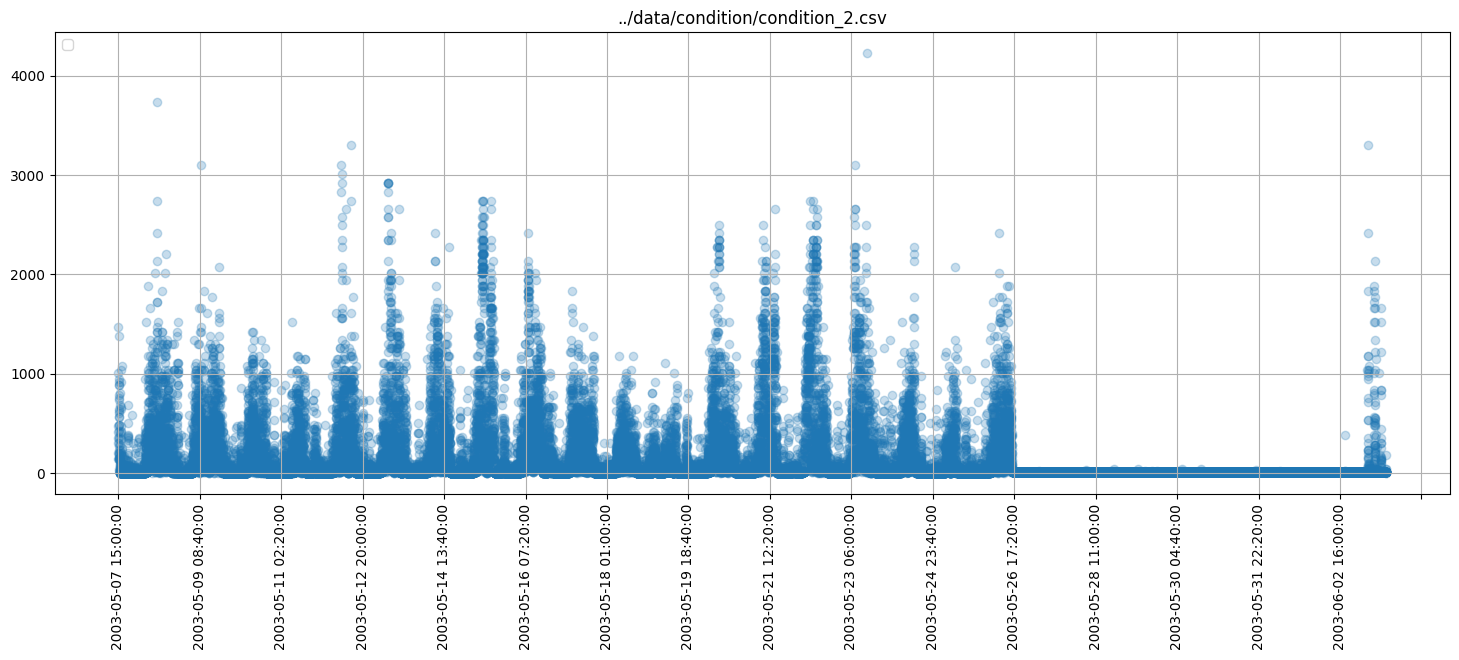

In [44]:
# load and plot full activity time series
my_file = data_path + 'condition/condition_2.csv'
df_temp = pd.read_csv(my_file)

my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_temp.timestamp, df_temp.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

### We observe a longer period (several days) where no/almost no activity is recorded. This does not seem reasonable (maybe the sensor was offline/not working properly in that phase). We will in the following remove days showing such extremely low activity.

In [45]:
# define (daily mean) threshold below which we consider the data as not usable
daily_threshold = 10

In [47]:
# iterate over all files and extract statistics 
mean_list = []
std_list = []
q99_list = []
std_q99_list = []

for i in range(23):
    j = 1+i
    my_file = data_path + 'condition/condition_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)
    
    # group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
        mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    # remove incomplete days (24*60 minutes = 1440)
    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # remove days with unreasonable low average daily activity
    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]
    
    display(df_temp_by_date)
    print()
    
    # extract statistics
    mean_temp = df_temp_by_date.mean_act.mean() # mean of mean daily activity
    std_temp = df_temp_by_date.mean_act.std() # stdev of mean daily activity
    mean_q99_temp = df_temp_by_date.q99_act.mean() # mean of 99th percentiles of daily activity
    std_q99_temp = df_temp_by_date.q99_act.std() # stdev of 99th percentiles of daily activity
    
    # add results to lists
    mean_list.append(mean_temp)
    std_list.append(std_temp)
    q99_list.append(mean_q99_temp)
    std_q99_list.append(std_q99_temp)

Extracting from: ../data/condition/condition_1.csv


,date,n,mean_act,q99_act,max_act
1,2003-05-08,1440,156.247222,890.00,1954
2,2003-05-09,1440,124.135417,948.00,1672
3,2003-05-10,1440,134.961806,1097.35,2146
4,2003-05-11,1440,99.439583,759.00,2080
5,2003-05-12,1440,316.874306,2055.04,3526
6,2003-05-13,1440,108.475694,879.08,2284
7,2003-05-14,1440,155.684722,1182.00,1836
8,2003-05-15,1440,170.877083,1146.00,1725
9,2003-05-16,1440,190.508333,1167.96,2016
10,2003-05-17,1440,177.760417,1205.79,1894



Extracting from: ../data/condition/condition_2.csv


,date,n,mean_act,q99_act,max_act
1,2003-05-08,1440,259.645139,1496.67,3736
2,2003-05-09,1440,244.096528,1362.23,3103
3,2003-05-10,1440,155.424306,1106.00,1423
4,2003-05-11,1440,116.463889,933.30,1515
5,2003-05-12,1440,224.541667,1878.53,3300
6,2003-05-13,1440,240.961806,2008.00,2918
7,2003-05-14,1440,226.484722,1544.89,2420
8,2003-05-15,1440,338.096528,2347.00,2741
9,2003-05-16,1440,279.047917,1829.00,2420
10,2003-05-17,1440,180.164583,1178.00,1829



Extracting from: ../data/condition/condition_3.csv


,date,n,mean_act,q99_act,max_act
1,2003-05-20,1440,276.413889,1638.72,2269
2,2003-05-21,1440,193.988194,1290.00,2066
3,2003-05-22,1440,221.613889,1671.05,3002
4,2003-05-23,1440,324.692361,1418.00,2492
5,2003-05-24,1440,236.545139,1358.23,1942
6,2003-05-25,1440,285.688889,1375.00,3296
7,2003-05-26,1440,296.554861,1767.00,3506
8,2003-05-27,1440,215.581250,1745.55,2651
9,2003-05-28,1440,266.568750,1418.00,2911
10,2003-05-29,1440,197.927778,1197.18,2415



Extracting from: ../data/condition/condition_4.csv


,date,n,mean_act,q99_act,max_act
1,2003-06-04,1440,248.211806,1381.23,2370
2,2003-06-05,1440,141.854861,977.91,1535
3,2003-06-06,1440,144.496528,1234.00,1738
4,2003-06-07,1440,158.490278,1159.00,4009
5,2003-06-08,1440,179.154861,1297.40,2853
6,2003-06-09,1440,185.045139,1355.00,2444
7,2003-06-10,1440,375.261111,1884.99,3542
8,2003-06-11,1440,468.204167,2200.87,4009
9,2003-06-12,1440,429.307639,1968.00,2600
10,2003-06-13,1440,584.284722,2786.31,6776



Extracting from: ../data/condition/condition_5.csv


,date,n,mean_act,q99_act,max_act
1,2003-06-13,1440,197.668750,1378.00,1880
2,2003-06-14,1440,186.179167,1143.00,2127
3,2003-06-15,1440,139.443056,1008.00,2194
4,2003-06-16,1440,135.969444,1128.96,2898
5,2003-06-17,1440,146.593056,1040.00,1822
6,2003-06-18,1440,152.128472,1224.75,2263
7,2003-06-19,1440,151.879861,1107.00,1822
8,2003-06-20,1440,140.978472,1335.00,2990
9,2003-06-21,1440,258.600000,1560.00,4609
10,2003-06-22,1440,161.252778,1254.00,2407



Extracting from: ../data/condition/condition_6.csv


,date,n,mean_act,q99_act,max_act
1,2003-08-20,1440,184.704861,1457.45,2020
2,2003-08-21,1440,137.007639,1457.45,3029
3,2003-08-22,1440,190.298611,1147.00,2218
4,2003-08-23,1440,213.820833,1705.33,4129
5,2003-08-24,1440,202.647222,1621.00,4003
6,2003-08-25,1440,178.664583,1457.45,2084
7,2003-08-26,1440,183.254167,1206.18,1898
8,2003-08-27,1440,244.943056,1503.67,2084
9,2003-08-28,1440,229.269444,1475.00,2513
10,2003-08-29,1440,249.221528,1206.18,1898



Extracting from: ../data/condition/condition_7.csv


,date,n,mean_act,q99_act,max_act
1,2004-05-05,1440,257.329861,1491.06,2269
2,2004-05-06,1440,103.154167,900.08,1882
3,2004-05-07,1440,377.166667,1767.00,3097
4,2004-05-08,1440,451.351389,1882.00,3097
5,2004-05-09,1440,190.309722,1445.45,4354
6,2004-05-10,1440,402.920139,2003.00,2735
7,2004-05-11,1440,233.445833,1801.77,4778
8,2004-05-12,1440,401.740278,2105.65,4631
9,2004-05-13,1440,478.898611,2199.00,2651
10,2004-05-14,1440,450.312500,1882.00,2492



Extracting from: ../data/condition/condition_8.csv


,date,n,mean_act,q99_act,max_act
1,2004-05-07,1440,221.910417,1651.72,4805
2,2004-05-08,1440,282.743750,2401.14,5437
3,2004-05-09,1440,194.040278,1871.38,3116
4,2004-05-10,1440,327.147222,2356.00,3991
5,2004-05-11,1440,80.737500,1097.35,2080
6,2004-05-12,1440,322.917361,3214.00,3869
7,2004-05-13,1440,167.770139,1300.00,4116
8,2004-05-14,1440,181.884028,2030.86,5437
9,2004-05-15,1440,252.531944,2187.48,3752
10,2004-05-16,1440,149.317361,1182.00,3418



Extracting from: ../data/condition/condition_9.csv


,date,n,mean_act,q99_act,max_act
1,2004-05-28,1440,170.072222,1250.00,2066
2,2004-05-29,1440,178.372222,1401.23,2066
3,2004-05-30,1440,187.088889,1445.45,2735
4,2004-05-31,1440,134.013889,1290.00,2003
5,2004-06-01,1440,190.214583,1463.00,2269
6,2004-06-02,1440,191.838194,1491.06,2492
7,2004-06-03,1440,181.152083,1538.89,2003
8,2004-06-04,1440,182.872222,1250.00,2131
9,2004-06-05,1440,128.270139,1197.18,2003
10,2004-06-06,1440,162.295833,1401.23,2415



Extracting from: ../data/condition/condition_10.csv


,date,n,mean_act,q99_act,max_act
1,2004-09-01,1440,426.464583,1829.00,2347
2,2004-09-02,1440,362.567361,1983.82,2741
3,2004-09-03,1440,335.220833,1718.00,2420
4,2004-09-04,1440,328.849306,1751.55,2420
5,2004-09-05,1440,312.786806,1730.88,2576
6,2004-09-06,1440,262.444444,1564.00,2138
7,2004-09-07,1440,376.700694,2008.00,3200
8,2004-09-08,1440,311.227778,2178.87,4935
9,2004-09-09,1440,294.996528,1645.11,2420
10,2004-09-10,1440,252.246528,1468.00,2497



Extracting from: ../data/condition/condition_11.csv


,date,n,mean_act,q99_act,max_act
1,2004-09-29,1440,132.408333,1250.00,2131
2,2004-09-30,1440,138.045833,1274.40,1824
3,2004-10-01,1440,184.743750,1332.00,2199
4,2004-10-02,1440,204.065972,1332.00,2066
5,2004-10-03,1440,49.852778,728.00,1418
6,2004-10-04,1440,71.424306,1137.00,1882
7,2004-10-05,1440,113.327083,1174.00,2131
8,2004-10-06,1440,131.345139,1212.00,1712
9,2004-10-07,1440,147.127083,1290.00,2066
10,2004-10-08,1440,270.131944,1712.00,3002



Extracting from: ../data/condition/condition_12.csv


,date,n,mean_act,q99_act,max_act
1,2005-03-09,1440,116.794444,1178.00,1773
2,2005-03-10,1440,257.561111,1863.77,3103
3,2005-03-11,1440,195.871528,1336.00,1946
4,2005-03-12,1440,168.595139,1217.00,1886
5,2005-03-13,1440,174.361806,1304.41,3622
6,2005-03-14,1440,236.844444,1217.00,1773
7,2005-03-15,1440,137.084028,975.00,1423
8,2005-03-16,1440,129.812500,1240.18,1614
9,2005-03-17,1440,171.890278,1093.13,1665
10,2005-03-18,1440,178.227778,1127.96,1946



Extracting from: ../data/condition/condition_13.csv


,date,n,mean_act,q99_act,max_act
1,2005-08-12,1440,293.556250,1449.00,2106
2,2005-08-13,1440,257.502083,1238.00,1919
3,2005-08-14,1440,136.571528,1099.87,1693
4,2005-08-15,1440,314.245833,1672.72,2460
5,2005-08-16,1440,227.264583,1523.67,2700
6,2005-08-17,1440,257.734722,1477.06,2784
7,2005-08-18,1440,290.222222,1495.00,2871
8,2005-08-19,1440,331.838194,1693.00,4859
9,2005-08-20,1440,180.706944,1261.79,2042
10,2005-08-21,1440,237.080556,1672.72,2460



Extracting from: ../data/condition/condition_14.csv


,date,n,mean_act,q99_act,max_act
1,2005-08-19,1440,143.526389,1871.38,2929
2,2005-08-20,1440,61.406944,783.00,1836
3,2005-08-21,1440,55.741667,606.00,978
4,2005-08-22,1440,69.557639,824.86,2284
5,2005-08-23,1440,69.473611,689.00,1570
6,2005-08-24,1440,87.114583,948.00,1894
7,2005-08-25,1440,54.871528,667.00,1341
8,2005-08-26,1440,102.237500,1062.74,1672
9,2005-08-27,1440,85.919444,948.00,1341
10,2005-08-28,1440,57.703472,703.03,1428



Extracting from: ../data/condition/condition_15.csv


,date,n,mean_act,q99_act,max_act
1,2005-08-31,1440,175.639583,1318.00,2962
2,2005-09-01,1440,131.647917,1126.00,2784
3,2005-09-02,1440,242.243056,1851.92,6825
4,2005-09-03,1440,88.244444,762.64,2312
5,2005-09-04,1440,78.904167,680.00,1277
6,2005-09-05,1440,37.477778,493.00,1162
7,2005-09-06,1440,52.272917,904.00,1802
8,2005-09-07,1440,70.611806,849.00,1860
9,2005-09-08,1440,42.695833,590.59,1449
10,2005-09-09,1440,170.363889,1092.00,2106



Extracting from: ../data/condition/condition_16.csv


,date,n,mean_act,q99_act,max_act
1,2005-09-23,1440,351.057639,1930.60,2752
2,2005-09-24,1440,320.678472,2929.00,6964
3,2005-09-25,1440,251.465278,1521.00,2356
4,2005-09-26,1440,246.621528,1367.23,2839
5,2005-09-27,1440,272.051389,1550.89,1954
6,2005-09-28,1440,225.793056,1384.00,2507
7,2005-09-29,1440,252.787500,1502.67,2214
8,2005-09-30,1440,190.786806,1260.00,3418
9,2005-10-01,1440,211.275694,1484.73,2668
10,2005-10-02,1440,250.957639,1672.00,2752



Extracting from: ../data/condition/condition_17.csv


,date,n,mean_act,q99_act,max_act
1,2005-11-09,1440,84.488194,705.00,1558
2,2005-11-10,1440,66.443750,620.00,1002
3,2005-11-11,1440,73.250000,742.03,1882
4,2005-11-12,1440,75.106250,674.81,1174
5,2005-11-13,1440,85.565972,653.42,1250
6,2005-11-14,1440,95.876389,801.00,1824
7,2005-11-15,1440,82.551389,653.42,1102
8,2005-11-16,1440,100.211806,751.00,1882
9,2005-11-17,1440,84.186806,683.00,1375
10,2005-11-18,1440,103.768056,911.00,1558



Extracting from: ../data/condition/condition_18.csv


,date,n,mean_act,q99_act,max_act
1,2005-11-09,1440,58.068056,526.00,723
2,2005-11-10,1440,67.372222,629.20,1234
3,2005-11-11,1440,72.817361,723.00,1355
4,2005-11-12,1440,77.766667,649.20,1089
5,2005-11-13,1440,86.177083,760.64,1355
6,2005-11-14,1440,65.537500,554.37,901
7,2005-11-15,1440,67.665972,679.00,1123
8,2005-11-16,1440,67.579861,561.00,1196
9,2005-11-17,1440,72.039583,723.00,1159
10,2005-11-18,1440,81.670139,679.00,990



Extracting from: ../data/condition/condition_19.csv


,date,n,mean_act,q99_act,max_act
1,2002-08-30,1440,152.131250,1261.00,1726
2,2002-08-31,1440,69.827083,906.69,3537
3,2002-09-01,1440,81.056944,948.00,3537
4,2002-09-02,1440,219.061806,1551.89,2288
5,2002-09-03,1440,199.300000,1221.00,2361
6,2002-09-04,1440,318.611111,1386.00,2361
7,2002-09-05,1440,172.038889,1221.00,2218
8,2002-09-06,1440,147.395139,1132.57,2288
9,2002-09-07,1440,94.944444,1043.00,8000
10,2002-09-08,1440,80.885417,861.00,2513



Extracting from: ../data/condition/condition_20.csv


,date,n,mean_act,q99_act,max_act
1,2002-05-25,1440,72.238194,666.00,1386
2,2002-05-26,1440,61.306250,748.25,1898
3,2002-05-27,1440,72.115278,702.03,1147
4,2002-05-28,1440,91.186111,748.25,2084
5,2002-05-29,1440,32.315972,470.52,1673
6,2002-05-30,1440,69.749306,813.72,2020
7,2002-05-31,1440,80.160417,850.47,1301
8,2002-06-01,1440,89.594444,878.08,1430
9,2002-06-02,1440,75.177083,918.00,1898
10,2002-06-03,1440,57.806250,688.00,1621



Extracting from: ../data/condition/condition_21.csv


,date,n,mean_act,q99_act,max_act
1,2002-06-14,1440,75.080556,1182.00,2146
2,2002-06-15,1440,53.889583,1146.00,2507
3,2002-06-16,1440,26.894444,603.38,1341
4,2002-06-17,1440,86.122222,978.00,1780
5,2002-06-18,1440,92.044444,1010.00,1894
6,2002-06-19,1440,101.710417,1062.74,1836
7,2002-06-20,1440,97.862500,824.86,2016
8,2002-06-21,1440,89.186111,1182.00,1954
9,2002-06-22,1440,79.535417,1084.09,2356
10,2002-06-23,1440,79.131944,1244.79,2752



Extracting from: ../data/condition/condition_22.csv


,date,n,mean_act,q99_act,max_act
1,2002-11-06,1440,135.768750,624.00,1110
2,2002-11-07,1440,144.859722,889.00,2020
3,2002-11-08,1440,180.046528,1030.13,2150
4,2002-11-09,1440,126.460417,948.00,1839
5,2002-11-10,1440,117.322222,1147.00,2084
6,2002-11-11,1440,170.493750,1110.00,3124
7,2002-11-12,1440,143.600694,797.86,1522
8,2002-11-13,1440,191.862500,1043.00,1898
9,2002-11-14,1440,201.346528,1168.96,2150
10,2002-11-15,1440,168.906944,1261.00,2435



Extracting from: ../data/condition/condition_23.csv


,date,n,mean_act,q99_act,max_act
1,2002-06-07,1440,178.434722,1375.00,2131
2,2002-06-08,1440,178.772222,1235.18,2341
3,2002-06-09,1440,160.198611,1102.00,2066
4,2002-06-10,1440,178.954861,1212.00,1659
5,2002-06-11,1440,225.211111,1607.00,2341
6,2002-06-12,1440,254.943750,1607.00,3506
7,2002-06-13,1440,286.463889,1824.00,3847
8,2002-06-14,1440,330.550694,1824.00,3195
9,2002-06-15,1440,353.613889,1918.60,5931
10,2002-06-16,1440,276.040972,1691.33,2735


In [49]:
# store results in data frame
condition_stats = pd.DataFrame(zip(df_condition.number, mean_list, q99_list, std_list, std_q99_list), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# add coefficient of variation (stdev / mean)
condition_stats['CV_MeanAct'] = condition_stats.Std_MeanAct / condition_stats.Mean_MeanAct
condition_stats['CV_Q99Act'] = condition_stats.Std_Q99Act / condition_stats.Mean_Q99Act
condition_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,152.199630,1248.365333,59.218240,537.750628,0.389083,0.430764
1,condition_2,211.280738,1538.777368,80.924414,528.810407,0.383018,0.343656
2,condition_3,280.810714,1605.270000,61.577770,287.349708,0.219286,0.179004
3,condition_4,286.064732,1710.240714,166.280241,609.340002,0.581268,0.356289
4,condition_5,172.622371,1300.538571,46.444164,259.816491,0.269051,0.199776
5,condition_6,194.754861,1428.765000,38.794611,153.984219,0.199197,0.107774
6,condition_7,295.975588,1651.887692,148.639974,401.224692,0.502203,0.242889
7,condition_8,200.443750,1804.810000,95.169158,745.719621,0.474792,0.413185
8,condition_9,177.031624,1420.541538,25.805786,151.907215,0.145769,0.106936
9,condition_10,296.403373,1691.552143,84.898469,256.541836,0.286429,0.151661


In [48]:
# look at correlation of different metrics
condition_stats.corr()

NameError: name 'condition_stats' is not defined

## Control

In [46]:
# show all control files
!ls ../input/the-depression-dataset/data/control

control_1.csv	control_16.csv	control_22.csv	control_29.csv	control_6.csv
control_10.csv	control_17.csv	control_23.csv	control_3.csv	control_7.csv
control_11.csv	control_18.csv	control_24.csv	control_30.csv	control_8.csv
control_12.csv	control_19.csv	control_25.csv	control_31.csv	control_9.csv
control_13.csv	control_2.csv	control_26.csv	control_32.csv
control_14.csv	control_20.csv	control_27.csv	control_4.csv
control_15.csv	control_21.csv	control_28.csv	control_5.csv


In [47]:
# iterate over all files and extract statistics 
mean_list_control = []
std_list_control = []
q99_list_control = []
std_q99_list_control = []

for i in range(32):
    j = 1+i
    my_file = data_path + 'control/control_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)
    
    # group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
        mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    # remove incomplete days (24*60 minutes = 1440)
    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # remove days with unreasonable low average daily activity
    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]
    
    print(df_temp_by_date)
    print()
    
    # extract statistics
    mean_temp = df_temp_by_date.mean_act.mean() # mean of mean daily activity
    std_temp = df_temp_by_date.mean_act.std() # stdev of mean daily activity
    mean_q99_temp = df_temp_by_date.q99_act.mean() # mean of 99th percentiles of daily activity
    std_q99_temp = df_temp_by_date.q99_act.std() # stdev of 99th percentiles of daily activity

    # add results to lists
    mean_list_control.append(mean_temp)
    std_list_control.append(std_temp)
    q99_list_control.append(mean_q99_temp)
    std_q99_list_control.append(std_q99_temp)

Extracting from: ../input/the-depression-dataset/data/control/control_1.csv
          date     n    mean_act  q99_act  max_act
1   2003-03-19  1440  185.568056  1607.00     3097
2   2003-03-20  1440  225.981250  1712.00     2651
3   2003-03-21  1440  169.663194  1375.00     2066
4   2003-03-22  1440  183.690972  1290.00     2415
5   2003-03-23  1440  347.075000  1332.00     1824
6   2003-03-24  1440  194.423611  1638.72     2341
7   2003-03-25  1440  310.715278  1882.00     2651
8   2003-03-26  1440  199.518750  1520.95     3195
9   2003-03-27  1440  183.131944  1358.23     2199
10  2003-03-28  1440  218.872222  1745.55     2415
11  2003-03-29  1440  276.368750  1509.00     4221
13  2003-03-31  1440  232.002778  1918.60     6117
14  2003-04-01  1440  109.022917  1418.00     2911
15  2003-04-02  1440  128.501389  3156.78     5575
16  2003-04-03  1440   69.356250  2003.00     3506
17  2003-04-04  1440   55.559028  2492.00     3097

Extracting from: ../input/the-depression-dataset/data/co

In [48]:
# store results in data frame
control_stats =  pd.DataFrame(zip(df_control.number, mean_list_control, q99_list_control, std_list_control, std_q99_list_control), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# add coefficient of variation (stdev / mean)
control_stats['CV_MeanAct'] = control_stats.Std_MeanAct / control_stats.Mean_MeanAct
control_stats['CV_Q99Act'] = control_stats.Std_Q99Act / control_stats.Mean_Q99Act
control_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,control_1,193.090712,1747.426875,79.180375,488.183345,0.410068,0.279373
1,control_2,407.458697,2044.739048,137.730227,352.116906,0.338023,0.172206
2,control_3,249.641270,1502.540000,52.558532,193.967304,0.210536,0.129093
3,control_4,186.394213,1711.935333,59.268265,298.854188,0.317973,0.174571
4,control_5,246.008987,1403.467059,132.278665,525.196868,0.537699,0.374214
5,control_6,279.535294,2064.458235,124.969577,572.223333,0.447062,0.277178
6,control_7,360.261161,2557.209286,127.277609,1520.288118,0.353293,0.594511
7,control_8,380.200787,1970.728667,125.202102,613.697773,0.329305,0.311407
8,control_9,141.170370,1145.389333,47.241626,269.018427,0.334643,0.234871
9,control_10,290.439782,1865.657143,83.298433,324.491722,0.286801,0.173929


In [49]:
# look at correlation of different metrics
control_stats.corr()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
Mean_MeanAct,1.000000,0.849838,0.684530,0.495685,-0.087928,0.273292
Mean_Q99Act,0.849838,1.000000,0.644619,0.690179,0.012979,0.425698
Std_MeanAct,0.684530,0.644619,1.000000,0.721062,0.659783,0.699030
Std_Q99Act,0.495685,0.690179,0.721062,1.000000,0.459930,0.932576
CV_MeanAct,-0.087928,0.012979,0.659783,0.459930,1.000000,0.661419
CV_Q99Act,0.273292,0.425698,0.699030,0.932576,0.661419,1.000000


<a id='6'></a>
# Comparison Condition vs Control

In [50]:
# basic stats of condition group
condition_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,177.359263,1293.282746,60.221801,318.413688,0.327726,0.248803
std,75.725958,335.760931,39.333135,168.601320,0.135601,0.122393
min,65.370585,665.491429,9.301415,96.547265,0.130202,0.106936
25%,120.196612,1030.523544,28.137077,190.752177,0.229600,0.158577
50%,172.622371,1300.538571,60.377039,287.349708,0.286429,0.199776
75%,235.399106,1574.730899,73.919049,389.201044,0.432363,0.349973
max,296.403373,1804.810000,166.280241,745.719621,0.581268,0.572878


In [51]:
# basic stats of control group
control_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,263.666975,1696.860976,81.291596,410.943519,0.310272,0.230448
std,71.689552,405.953265,31.768637,309.473258,0.084625,0.118904
min,139.782917,915.619333,43.967642,134.236127,0.144795,0.083808
25%,201.082937,1401.476008,54.296764,213.154471,0.250760,0.140532
50%,262.758110,1729.681104,70.213031,307.159779,0.318632,0.197742
75%,315.547474,1867.617679,119.680854,497.436726,0.354754,0.284825
max,407.458697,2635.942143,137.730227,1520.288118,0.537699,0.594511


### => Control group shows higher activity (Mean_MeanAct, Mean_Q99Act as well as Std_MeanAct and Std_Q99Act; CVs are however on similar level).
### Let's visualize:

In [52]:
# combine statistics into one common data frame
condition_stats['Group'] = 'Condition'
control_stats['Group'] = 'Control'
combined_stats = pd.concat([condition_stats, control_stats])

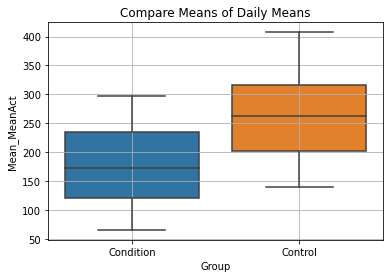

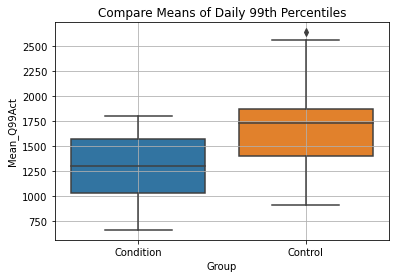

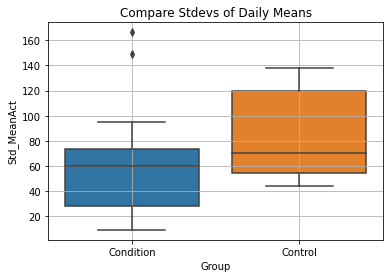

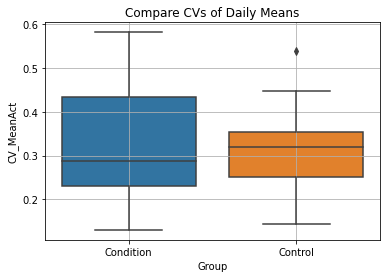

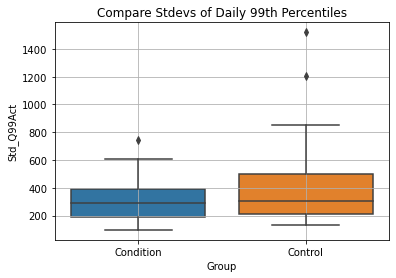

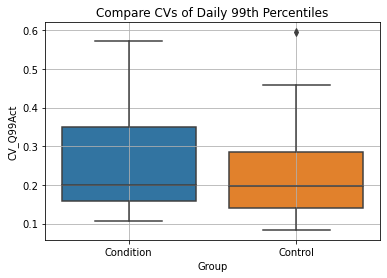

In [53]:
# compare means of daily means for the two groups
sns.boxplot(data=combined_stats, x='Group', y='Mean_MeanAct')
plt.title('Compare Means of Daily Means')
plt.grid()
plt.show()

# compare means of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='Mean_Q99Act')
plt.title('Compare Means of Daily 99th Percentiles')
plt.grid()
plt.show()

# compare stdevs of daily means
sns.boxplot(data=combined_stats, x='Group', y='Std_MeanAct')
plt.title('Compare Stdevs of Daily Means')
plt.grid()
plt.show()

# compare CVs of daily means
sns.boxplot(data=combined_stats, x='Group', y='CV_MeanAct')
plt.title('Compare CVs of Daily Means')
plt.grid()
plt.show()

# compare stdevs of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='Std_Q99Act')
plt.title('Compare Stdevs of Daily 99th Percentiles')
plt.grid()
plt.show()

# compare CVs of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='CV_Q99Act')
plt.title('Compare CVs of Daily 99th Percentiles')
plt.grid()
plt.show()

### Look at individual observations:

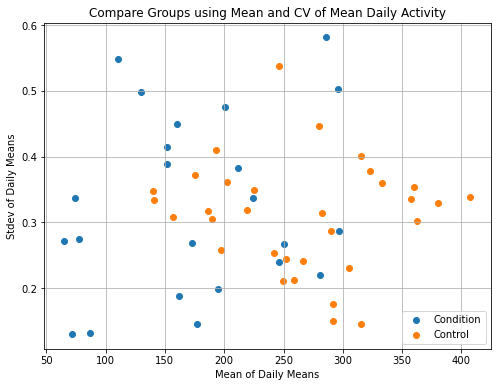

In [54]:
# compare two groups using scatter plot
plt.figure(figsize=(8,6))
plt.scatter(condition_stats.Mean_MeanAct, condition_stats.CV_MeanAct, label='Condition')
plt.scatter(control_stats.Mean_MeanAct, control_stats.CV_MeanAct, label='Control')
plt.legend(loc='lower right')
plt.xlabel('Mean of Daily Means')
plt.ylabel('Stdev of Daily Means')
plt.title('Compare Groups using Mean and CV of Mean Daily Activity')
plt.grid()
plt.show()

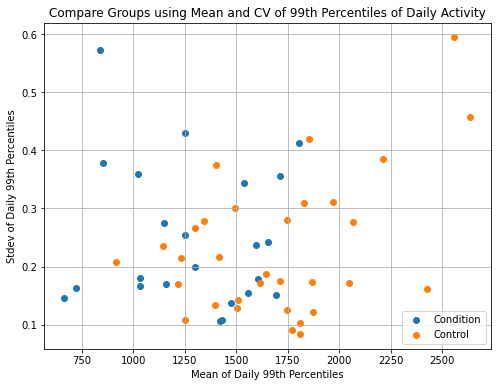

In [55]:
# compare two groups using scatter plot - now use quantile based metrics
plt.figure(figsize=(8,6))
plt.scatter(condition_stats.Mean_Q99Act, condition_stats.CV_Q99Act, label='Condition')
plt.scatter(control_stats.Mean_Q99Act, control_stats.CV_Q99Act, label='Control')
plt.legend(loc='lower right')
plt.xlabel('Mean of Daily 99th Percentiles')
plt.ylabel('Stdev of Daily 99th Percentiles')
plt.title('Compare Groups using Mean and CV of 99th Percentiles of Daily Activity')
plt.grid()
plt.show()

In [56]:
# interactive plot using additional "quantile" dimension
fig = px.scatter_3d(combined_stats, x='Mean_MeanAct', y='Std_MeanAct', z='CV_Q99Act',
                    color='Group',
                    hover_data=['number'],
                    opacity=0.5)
fig.update_layout(title='Compare Groups using Mean/Stdev of Mean Daily Activity and CV of Daily 99th Perc.')
fig.show()

#### Does afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I) make a difference within the condition group?

In [57]:
# add stats to original data frame (condition group) to get access to all features
df_condition_x = pd.concat([df_condition, condition_stats.drop('number', axis=1)], axis=1)
df_condition_x = df_condition_x.drop('Group', axis=1)
df_condition_x.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0,152.199630,1248.365333,59.218240,537.750628,0.389083,0.430764
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,-13.0,211.280738,1538.777368,80.924414,528.810407,0.383018,0.343656
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,1.0,280.810714,1605.270000,61.577770,287.349708,0.219286,0.179004
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,-4.0,286.064732,1710.240714,166.280241,609.340002,0.581268,0.356289
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0,172.622371,1300.538571,46.444164,259.816491,0.269051,0.199776


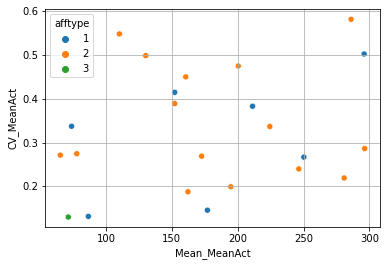

In [58]:
# scatterplot, show afftype via color
sns.scatterplot(data=df_condition_x,
                x='Mean_MeanAct', y='CV_MeanAct',
                hue='afftype')
plt.grid()
plt.show()

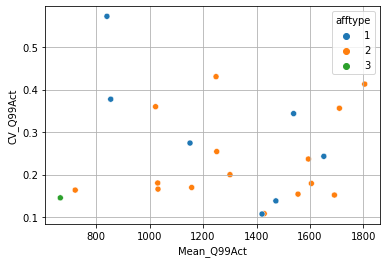

In [59]:
# scatterplot, show afftype via color
sns.scatterplot(data=df_condition_x,
                x='Mean_Q99Act', y='CV_Q99Act',
                hue='afftype')
plt.grid()
plt.show()

#### Ok, at least nothing obvious...

## For plots of all time series see the additional notebook https://www.kaggle.com/docxian/depression-and-motor-activity-all-plots